# Исследование объявлений о продаже квартир


# Описание проекта

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [2]:
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

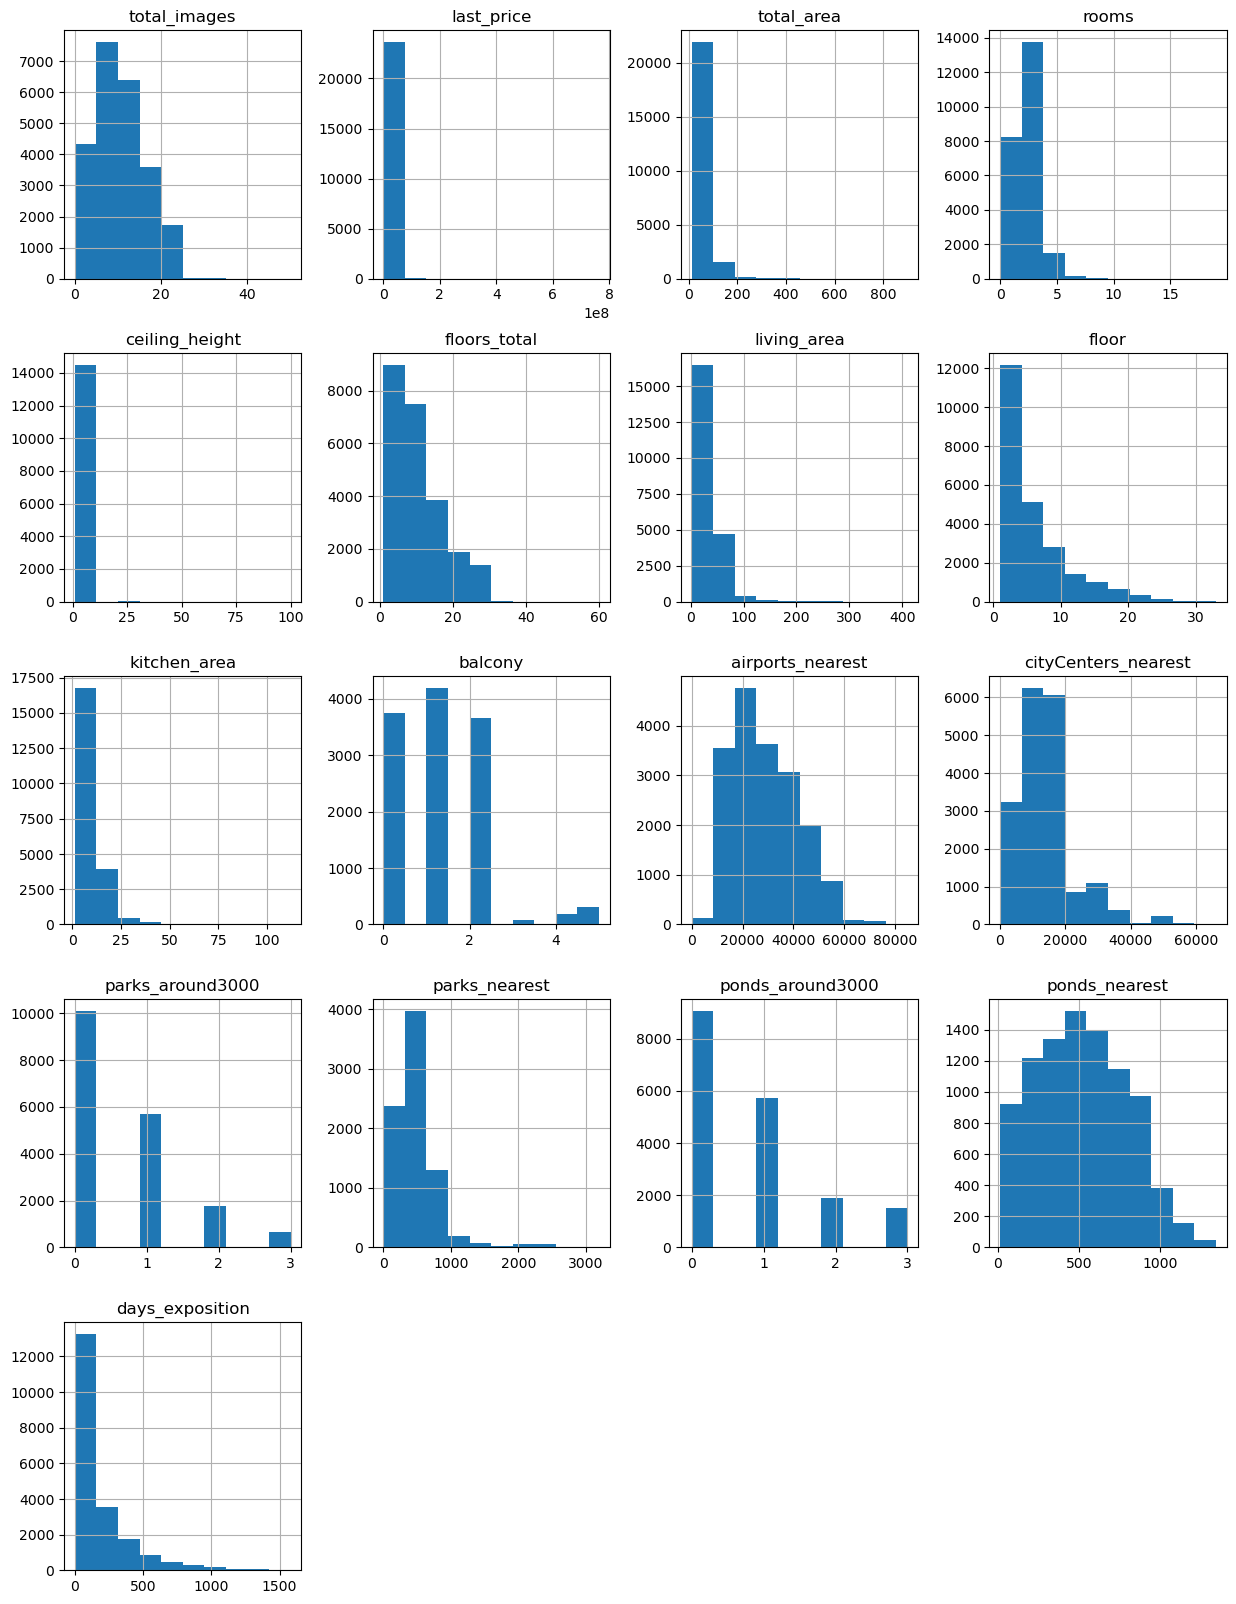

In [4]:
#строим гистограмму для всех столбцов таблицы
data.hist(figsize=(15, 20))

Видно много пропусков, у некоторых данных неверный тип, на некоторых гистограммах ненормальное распределение, скорей всего из-за аномально высоких значений

### Предобработка данных

#### Найдите и изучите пропущенные значения в столбцах

In [5]:
#ищем пропуски
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
#заполняем пропущенные значения
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()
data = data.dropna(subset=['floors_total']).reset_index(drop=True)
for y in data['rooms'].unique():
    data.loc[(data['rooms'] == y) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == y), 'living_area'].median()
data['is_apartment'] = data['is_apartment'].fillna(False)

In [7]:
#проверим какое количество пропусков это не студия
data.query('kitchen_area.isna() and studio == False').count()

total_images            2085
last_price              2085
total_area              2085
first_day_exposition    2085
rooms                   2085
ceiling_height          2085
floors_total            2085
living_area             2085
floor                   2085
is_apartment            2085
studio                  2085
open_plan               2085
kitchen_area               0
balcony                  617
locality_name           2076
airports_nearest        1430
cityCenters_nearest     1432
parks_around3000        1432
parks_nearest            647
ponds_around3000        1432
ponds_nearest            765
days_exposition         1900
dtype: int64

In [8]:
#большая часть пропусков это не студия, поэтому заполнить 0 не получиться, лучше заполнить медианным
for y in data['rooms'].unique():
    data.loc[(data['rooms'] == y) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['rooms'] == y), 'kitchen_area'].median()

In [9]:
#смотрим какое количество пропусков это студия
data.query('kitchen_area.isna() and studio == True').count()

total_images            135
last_price              135
total_area              135
first_day_exposition    135
rooms                   135
ceiling_height          135
floors_total            135
living_area             135
floor                   135
is_apartment            135
studio                  135
open_plan               135
kitchen_area              0
balcony                  80
locality_name           135
airports_nearest         86
cityCenters_nearest      86
parks_around3000         86
parks_nearest            19
ponds_around3000         86
ponds_nearest            47
days_exposition         121
dtype: int64

In [10]:
#большая часть оставшихся пропусков это студия, из-за этого кухня и зал совмещены, поэтому нет площади кухни
#заполняем площадь кухни у квартир студий
data['kitchen_area'] = data['kitchen_area'].fillna(0)

In [11]:
data['balcony'] = data['balcony'].fillna(0)
data['airports_nearest'] = data['airports_nearest'].fillna(0)
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)

In [12]:
#повторно проверяем количество пропусков
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name             48
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3172
dtype: int64

In [13]:
#проверим сумму кухонной и жилой площадей на предмет превышений общей площади
data['new_total_area'] = (data['living_area'] + data['kitchen_area'])  - data['total_area']
data['new_total_area'].value_counts()
#значения не превышают общую площадь

-10.00    593
-8.00     576
-12.00    542
-9.00     529
-11.00    525
         ... 
-14.33      1
-32.90      1
-14.98      1
-33.71      1
-22.95      1
Name: new_total_area, Length: 3014, dtype: int64

In [14]:
((data['living_area'] + data['kitchen_area'])  - data['total_area']).value_counts()

-10.00    593
-8.00     576
-12.00    542
-9.00     529
-11.00    525
         ... 
-14.33      1
-32.90      1
-14.98      1
-33.71      1
-22.95      1
Length: 3014, dtype: int64

Причины пропусков данных:
- В колонке `ceiling_height` возможно пропущены значения из-за того, что люди не измеряли или не смогли измерить высоту потолков.
- В колонке `floors_total` возможно люди забыли или не знают сколько этажей в доме.
- В колонке `living_area` наверное так же как и значения высоты потолков, люди не измеряли или не смогли измерить площадь.
- В колонке `is_apartment` всего 2775 значений из которых 2725 False и 50 True, возможно люди не знают, что значит апартаменты и не заполнили эту графу.
- В колонке `kitchen_area` большая часть пропущенных значений это не студия, возможно нет кухни или не знают размеров.
- В колонке `balcony` скорей всего пропуски из-за того что в квартире нет балконов.
- В колонке `locality_name` возможно люди не знают к какому населеному пункту относятся или не имеет названия.
- В колонке `airports_nearest` из-за того что рядом нет аэропорта или он находится в десятках, сотнях киллометров.
- В колонке `cityCenters_nearest` из-за того что рядом нет города или он находится в десятках, сотнях киллометров.
- В колонке `parks_around3000` скорей всего отсутствуют парки в радиусе 3км.
- В колонке `parks_nearest` из-за отсутствия парков отсутствует расстояние до них.
- В колонке `ponds_around3000` количество пропущенных данных парков и водоемов равно, так как они связаны, часто водоемы находятся в парках и если нет парков, то и нет водоемов.
- В колонке `ponds_nearest` из-за отсутствия водоемов отсутствует расстояние до них.
- В колонке `days_exposition` возможно из-за того что объявление не успело провисеть и было сразу снято с публикации.

#### Рассмотрите типы данных в каждом столбце

In [15]:
#смотрим какой тип данных у столбцов
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23613 entries, 0 to 23612
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23613 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23613 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          23613 non-null  bool   
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          23613 non-null  float64
 13  balcony               23613 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [16]:
#изменяем тип данных
data['last_price'] = data['last_price'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['airports_nearest'] = data['airports_nearest'].astype('int')
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['parks_nearest'] = data['parks_nearest'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['ponds_nearest'] = data['ponds_nearest'].astype('int')
data['first_day_exposition']= pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#проверяем изменился ли тип данных 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23613 entries, 0 to 23612
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  int32         
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        23613 non-null  float64       
 6   floors_total          23613 non-null  int32         
 7   living_area           23613 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          23613 non-null  float64       
 13  balcony         

- В колонке `last_price` изменил тип данных `int`, потому что сумма большое, круглое число и хвосты тут не влияют ни на что.
- В колонке `floors_total` изменил тип данных на `int`, потому что количество этажей всегда целое число.
- В колонке `balcony` изменил тип данных на `int`, потому что количество балконов всегда целое число.
- В колонке `airports_nearest` изменил тип данных на `int`, потому что расстояние указано в метрах и нам не нужны лишние значения в сантиметрах.
- В колонке `cityCenters_nearest` изменил тип данных на `int`, потому что расстояние указано в метрах и нам не нужны лишние значения в сантиметрах.
- В колонке `parks_around3000` изменил тип данных на `int`, потому что количество парков может быть только целое число.
- В колонке `parks_nearest` изменил тип данных на `int`, потому что расстояние указано в метрах и нам не нужны лишние значения в сантиметрах.
- В колонке `ponds_around3000` изменил тип данных на `int`, потому что количество водоемов может быть только целое число.
- В колонке `ponds_nearest` изменил тип данных на `int`, потому что расстояние указано в метрах и нам не нужны лишние значения в сантиметрах.
- В колонке `first_day_exposition` изменил тип данных на `datetime`, чтобы можно было делать разные операции с датой.

#### Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты.

In [17]:
#приводим к нижнему регистру 
data['locality_name'] = data['locality_name'].str.lower()
#смотрим уникальные значения
data['locality_name'].unique()
#устраняем неявные дубликаты
data['locality_name']= data['locality_name'].str.replace('ё', 'е', case = True)
duplicates_names = ['коттеджный поселок', 'поселок городского типа', 'городской поселок']
data['locality_name'].replace(regex=duplicates_names, value='поселок', inplace=True)

In [18]:
#повторно смотрим уникальные значения
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок красный бор', 'гатчина', 'деревня федоровское', 'выборг',
       'кронштадт', 'кировск', 'деревня новое девяткино',
       'поселок металлострой', 'поселок лебяжье', 'поселок сиверский',
       'поселок молодцово', 'поселок кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок ефимовский', 'поселок плодовое', 'деревня заклинье',
       'поселок торковичи', 'поселок первомайское', 'красное село',
       'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет', 'сланцы',
       'село путилово', 'ивангород', 'мурино', 'шлиссельбург',
       'никольское', 'зелено

#### Найдите и устраните редкие и выбивающиеся значения

In [19]:
#смотрим описание данных и устраняем аномалии
data['ceiling_height'].describe()
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data['ceiling_height'] / 10

data['ceiling_height'].unique()
data.loc[data['ceiling_height'] < 2.4, 'ceiling_height'] = data['ceiling_height'].median()

data['days_exposition'].describe()
data = data.query('days_exposition <= 730 or days_exposition.isna()')

data['last_price'].describe().astype('int')
data = data.loc[(data['last_price'] > 12190) & (data['last_price'] < 763000000)]

In [20]:
#делаем сброс старых индексов с заменой на новые
data = data.reset_index(drop=True)
#вычислим сколько % данных мы удалили
old_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.shape[0] / old_data.shape[0]

0.964724249968353

- В колонке `ceiling_height` обнаружены значения выше 25 метров, скорей всего люди не отделили цифры запятой и есть очень низкие потолки около 1 метра
- В колонке `days_exposition` есть объявления которые находятся более 2 лет, возможно из-за того что с этими квартирами есть проблемы и их небольшое количество
- В колонке `last_price` есть очень маленькое значение в 12190 и слишком большое в 763млн, эти значения кажутся неправдоподобными 

Из всех данных, мы удалили 3.6%

### Посчитайте и добавьте в таблицу новые столбцы

#### Посчитайте цену одного квадратного метра

In [21]:
#создаем новый столбец и записываем в него деление цены на площаль квартиры 
data['price_per_square_meter'] = data['last_price'] / data['total_area']
#меняем тип с float на int
data['price_per_square_meter'] = data['price_per_square_meter'].astype('int')

#### Добавьте день недели публикации объявления

In [22]:
#создаем столбец с днем недели публикации объявления
data['day_of_the_publication_week'] = data['first_day_exposition'].dt.weekday 
#меняем названия дней
data['day_of_the_publication_week'] = data['day_of_the_publication_week'].replace({
    0: 'понедельник',
    1: 'вторник',
    2: 'среда',
    3: 'четверг',
    4: 'пятница',
    5: 'суббота',
    6: 'воскресенье',
}
)

#### Добавьте месяц публикации объявления

In [23]:
#создаем столбец с месяцем публикации объявления
data['publication_month'] = data['first_day_exposition'].dt.month
data['publication_month'] = data['publication_month'].replace({
    1: 'январь',
    2: 'февраль',
    3: 'март',
    4: 'апрель',
    5: 'май',
    6: 'июнь',
    7: 'июль',
    8: 'август',
    9: 'сентябрь',
    10: 'октябрь',
    11: 'ноябрь',
    12: 'декабрь',
}
)

#### Добавьте год публикации объявления

In [24]:
#создаем столбец с годом публикации объявления
data['publication_year'] = data['first_day_exposition'].dt.year

#### Добавьте тип этажа квартиры

In [25]:
#создаем функцию для категоризации типа этажа квартиры
def categorize_apartment_floor(row):
    floor = row['floor']
    floors_total = row['floors_total']
    try:
        if floor == 1:
            return 'первый'
        elif floors_total == floor:
            return 'последний'
        else:
            return 'другой'
    except:
        return 'нет категории'
data['floor_type'] = data.apply(categorize_apartment_floor, axis=1)

#### Добавьте расстояние до центра города в километрах

In [26]:
#создаем столбец с расстояние до центра города в километрах
data['distance_to_city_center_in_km'] = data['cityCenters_nearest'] / 1000
#округляем до целых чисел
data['distance_to_city_center_in_km'] = data['distance_to_city_center_in_km'].round()

### Проведите исследовательский анализ данных

#### Изучите следующие параметры объектов

##### Изучите общую площадь

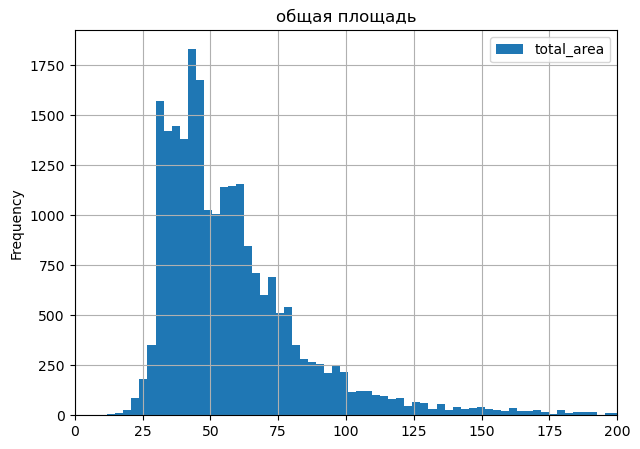

Среднее 60
Медиана 52


In [27]:
#строим гистаграмму для общей площади
data.plot(kind='hist',
y='total_area',
title='общая площадь',
figsize=(7, 5),
bins=300,
grid=True,
legend=True)
plt.xlim(0, 200)
plt.show()
#выводим среднее и медиану с проверкой на NaN
mean_total_area = data['total_area'].mean()
median_total_area = data['total_area'].median()

if not pd.isna(mean_total_area):
    print('Среднее', round(mean_total_area))

if not pd.isna(median_total_area):
    print('Медиана', round(median_total_area))

Малое количество квартир с площадью от 10 до 30 м^2, больше всего объявлений с площадью от 30 до 60 м^2, после 60 м^2 начинается равномерное падение. Квартир до 30 м^2 меньше чем квартир с площадью больше 100 м^2. График имеет положительно скошенное распределение.

##### Изучите жилую площадь

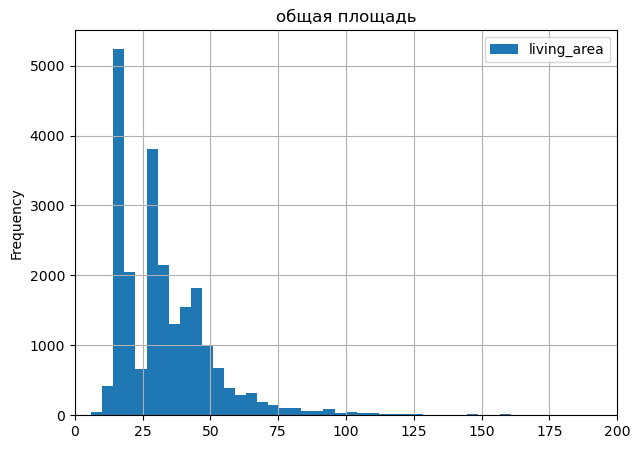

Среднее 34
Медиана 30


In [28]:
#строим гистаграмму для жилой площади
data.plot(kind='hist',
y='living_area',
title='общая площадь',
figsize=(7, 5),
bins=100,
grid=True,
legend=True)
plt.xlim(0, 200)
plt.show()

mean_living_area = data['living_area'].mean()
median_living_area = data['living_area'].median()

if not pd.isna(mean_living_area):
    print('Среднее', round(mean_living_area))

if not pd.isna(median_living_area):
    print('Медиана', round(median_living_area))

Больше всего квартир с жилой площадью от 10 до 20 м^2, основная масса это квартиры от 10 до 50 м^2, с 50 м^2 начинается падение графика. График имеет положительно скошенное распределение.

##### Изучите площадь кухни

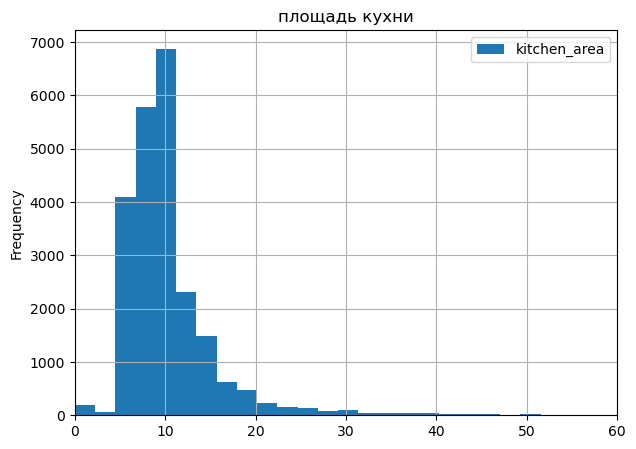

Среднее 10.32
Медиана 9.0


In [29]:
#строим гистаграмму для площади кухни
data.plot(kind='hist',
y='kitchen_area',
title='площадь кухни',
figsize=(7, 5),
bins=50,
grid=True,
legend=True)
plt.xlim(0, 60)
plt.show()

mean_kitchen_area = data['kitchen_area'].mean()
median_kitchen_area = data['kitchen_area'].median()

if not pd.isna(mean_kitchen_area):
    print('Среднее', round(mean_kitchen_area, 2))

if not pd.isna(median_kitchen_area):
    print('Медиана', round(median_kitchen_area, 2))

Больше всего это значения кухни от 8 до 12 м^2, основная масса площади кухни находится в пределах от 4 до 12 м^2, очень мало квартир с кухней от 0 до 4 м^2, с 12 м^2 график начинает падать. График имеет положительно скошенное распределение.

##### Изучите цену объекта

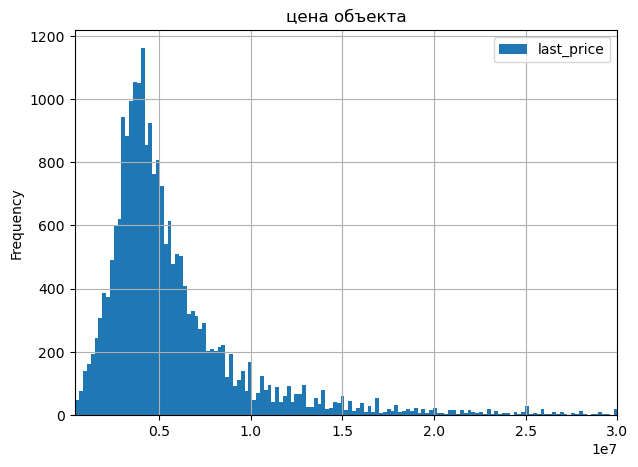

Среднее 6431910
Медиана 4600000


In [30]:
#строим гистаграмму для цены объекта
data.plot(kind='hist',
y='last_price',
title='цена объекта',
figsize=(7, 5),
bins=2000, 
grid=True,
legend=True)
plt.xlim(400000, 30000000)
plt.show()

mean_last_price = data['last_price'].mean()
median_last_price = data['last_price'].median()

if not pd.isna(mean_last_price):
    print('Среднее', round(mean_last_price))

if not pd.isna(median_last_price):
    print('Медиана', round(median_last_price))

Большинство квартир стоят от 3млн до 5млн, после 5млн происходит падение графика, основная масса это квартира от 2млн до 10млн. График имеет положительно скошенное распределение.

##### Изучите количество комнат

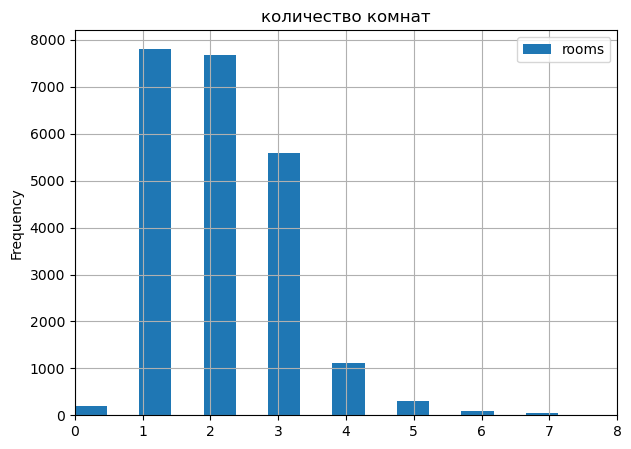

Среднее 2
Медиана 2


In [31]:
#строим гистаграмму для количества комнат
data.plot(kind='hist',
y='rooms',
title='количество комнат',
figsize=(7, 5),
bins=40,
grid=True,
legend=True)
plt.xlim(0, 8)
plt.show()

mean_rooms = data['rooms'].mean()
median_rooms = data['rooms'].median()

if not pd.isna(mean_rooms):
    print('Среднее', round(mean_rooms))

if not pd.isna(median_rooms):
    print('Медиана', round(median_rooms))

Большинство квартир с 1-2 комнатами, основная масса 1-3 комнаты, после 3 происходит падение графика. График имеет положительно скошенное распределение.

##### Изучите высоту потолков

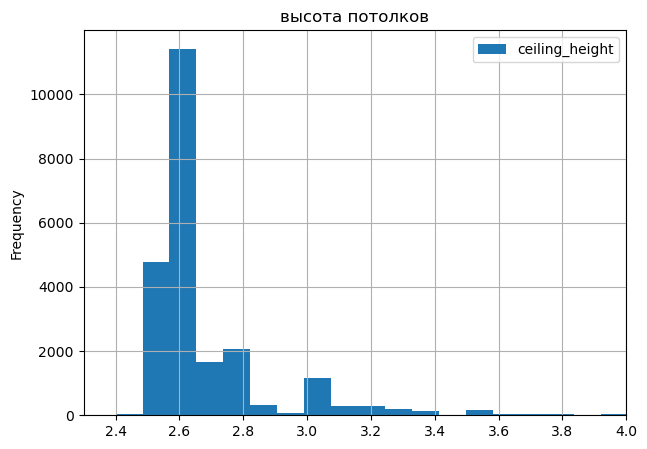

Среднее 2.7
Медиана 2.65


In [32]:
#строим гистаграмму для высоты потолков
data.plot(kind='hist',
y='ceiling_height',
title='высота потолков',
figsize=(7, 5),
bins=90,
grid=True,
legend=True)
plt.xlim(2.3, 4)
plt.show()

mean_ceiling_height = data['ceiling_height'].mean()
median_ceiling_height = data['ceiling_height'].median()

if not pd.isna(mean_ceiling_height):
    print('Среднее', round(mean_ceiling_height, 2))

if not pd.isna(median_ceiling_height):
    print('Медиана', round(median_ceiling_height, 2))

В основном большинство потолков 2.5 метра, основная масса это потолки высотой 2.5-2.65 метра, после 2.65 идет падение графика

##### Изучите этаж квартиры

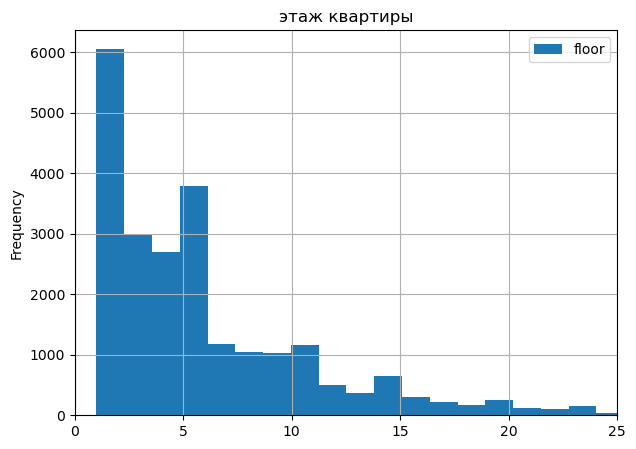

Среднее 6
Медиана 4


In [33]:
#строим гистаграмму для этажа квартиры
data.plot(kind='hist',
y='floor',
title='этаж квартиры',
figsize=(7, 5),
bins=25,
grid=True,
legend=True)
plt.xlim(0, 25)
plt.show()
print('Среднее', round(data['floor'].mean()))
print('Медиана', round(data['floor'].median()))

Больше всего квартир с 2 этажом, основная масса квартиры с этажом 1-5, после 5 этажа происходит падение графика. График имеет распределине с обрывом слева

##### Изучите тип этажа квартиры

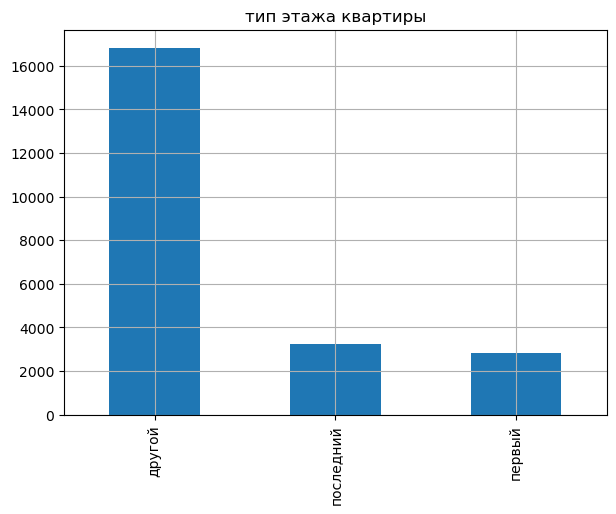

In [34]:
#строим гистаграмму для типа этажа квартиры
data['floor_type'].value_counts().plot(kind='bar',
title='тип этажа квартиры',
figsize=(7, 5),
grid=True)
plt.show()

Меньше всего квартир с первым этажом. Чуть больше квартир с последним этажом. Больше всего квартир с другим этажом

##### Изучите общее количество этажей в доме

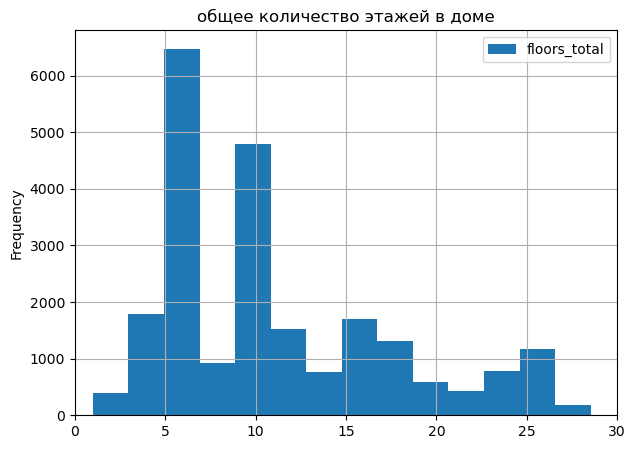

Среднее 11
Медиана 9


In [35]:
#строим гистаграмму для общего количества этажей в доме
data.plot(kind='hist',
y='floors_total',
title='общее количество этажей в доме',
figsize=(7, 5),
bins=30,
grid=True,
legend=True)
plt.xlim(0, 30)
plt.show()

mean_floors_total = data['floors_total'].mean()
median_floors_total = data['floors_total'].median()

if not pd.isna(mean_floors_total):
    print('Среднее', round(mean_floors_total))

if not pd.isna(median_floors_total):
    print('Медиана', round(median_floors_total))

Больше всего домов с количеством этажей 5. Потом идут дома с 9 этажами. Имеют почти одинаковое число дома с количеством этажей 4, 10, 12, 16, 25 . Мало домов с 1 этажом и домов с 25+ этажами. График имеет распределение с двумя пиками

##### Изучите расстояние до центра города в метрах

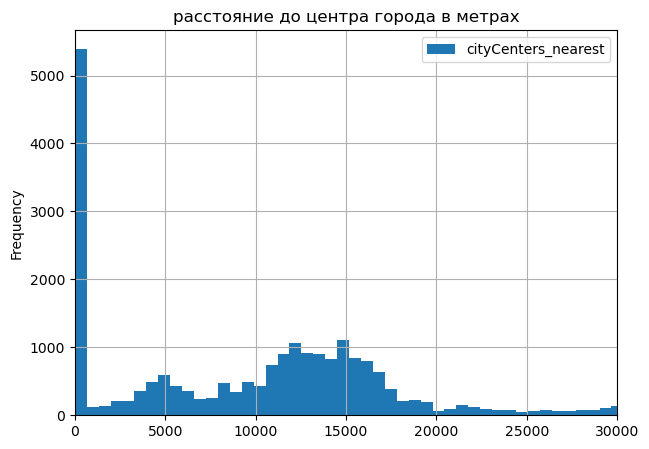

Среднее 10912
Медиана 11323


In [36]:
#строим гистаграмму для расстояния до центра города в метрах
data.plot(kind='hist',
y='cityCenters_nearest',
title='расстояние до центра города в метрах',
figsize=(7, 5),
bins=100,
grid=True,
legend=True)
plt.xlim(0, 30000)
plt.show()

mean_city_centers_nearest = data['cityCenters_nearest'].mean()
median_city_centers_nearest = data['cityCenters_nearest'].median()

if not pd.isna(mean_city_centers_nearest):
    print('Среднее', round(mean_city_centers_nearest))

if not pd.isna(median_city_centers_nearest):
    print('Медиана', round(median_city_centers_nearest))

Больше всего значений 0 метров, это может быть связано с тем что рядом нет города или он находится в 100+ км от дома или люди не знают расстояние до города и не указали. После идет основная масса это расстояние от 11000 метров до 16500 метров.

##### Изучите расстояние до ближайшего аэропорта

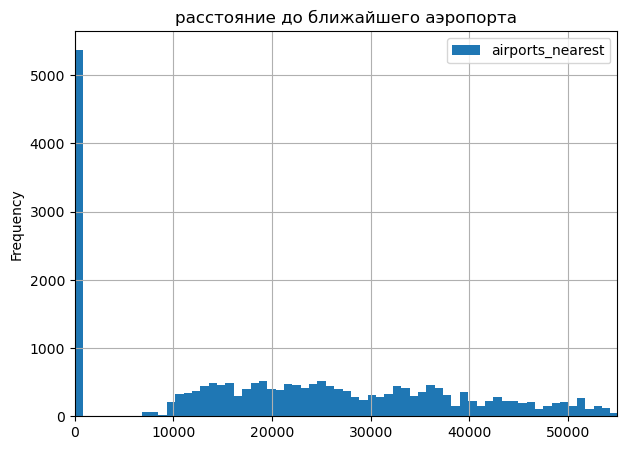

Среднее 22045
Медиана 21793


In [37]:
#строим гистаграмму для расстояния до ближайшего аэропорта
data.plot(kind='hist',
y='airports_nearest',
title='расстояние до ближайшего аэропорта',
figsize=(7, 5),
bins=100,
grid=True,
legend=True)
plt.xlim(0, 55000)
plt.show()

mean_airports_nearest = data['airports_nearest'].mean()
median_airports_nearest = data['airports_nearest'].median()

if not pd.isna(mean_airports_nearest):
    print('Среднее', round(mean_airports_nearest))

if not pd.isna(median_airports_nearest):
    print('Медиана', round(median_airports_nearest))

Больше всего значений 0 метров, проблема может быть такой же как и у расстояния до города. Расстояние от 10000 до 26000 метров находится практически на равном значении. Если не смотреть на 0, то график имеет равномерное распределение

##### Изучите расстояние до ближайшего парка

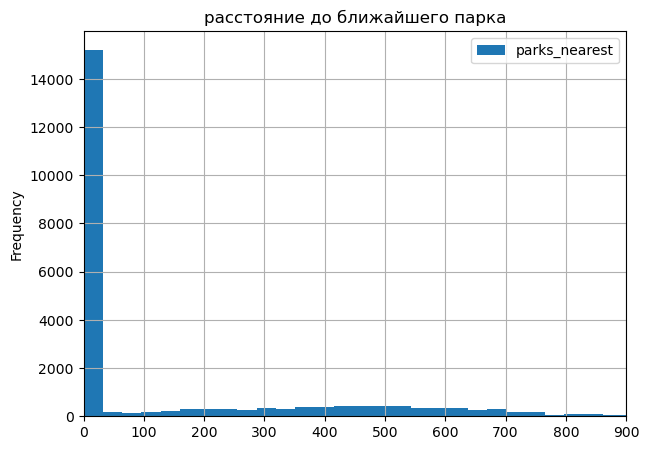

Среднее 166
Медиана 0


In [38]:
#строим гистаграмму для расстояния до ближайшего парка
data.plot(kind='hist',
y='parks_nearest',
title='расстояние до ближайшего парка',
figsize=(7, 5),
bins=100,
grid=True,
legend=True)
plt.xlim(0, 900)
plt.show()

mean_parks_nearest = data['parks_nearest'].mean()
median_parks_nearest = data['parks_nearest'].median()

if not pd.isna(mean_parks_nearest):
    print('Среднее', round(mean_parks_nearest))

if not pd.isna(median_parks_nearest):
    print('Медиана', round(median_parks_nearest))

Больше всего значений 0 метров, проблема может быть такой же как и у расстояния до города. Основная масса это расстояние от 200 до 700 метров. Если не смотреть на 0, то график имеет равномерное распределение

##### Изучите день и месяц публикации объявления

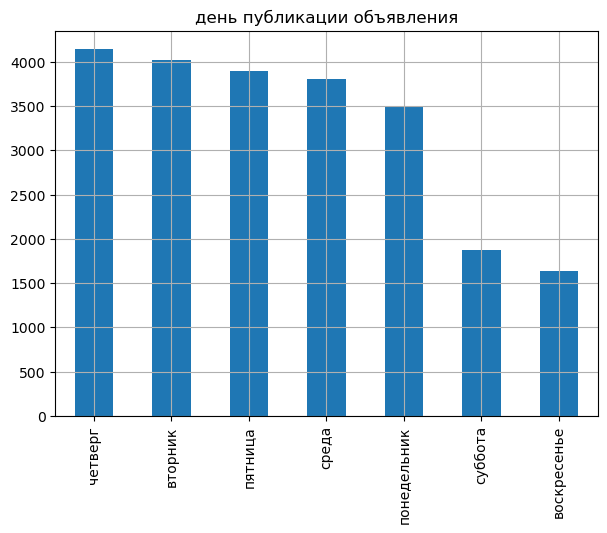

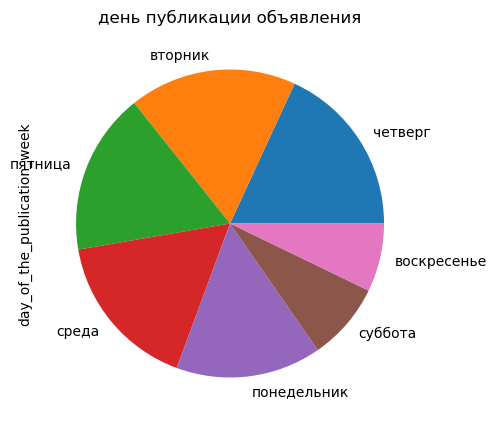

In [39]:
#строим гистаграмму для дня публикации объявления
data['day_of_the_publication_week'].value_counts().plot(kind='bar',
title='день публикации объявления',
figsize=(7, 5),
grid=True)
plt.show()
#строим круговой график для дня публикации объявления
data['day_of_the_publication_week'].value_counts().plot(kind='pie',
title='день публикации объявления',
figsize=(7, 5),
grid=True)
plt.show()

Чаще всего публиковали объявление в четверг и вторник. Реже всего в выходные. В середине находятся пятница, среда и понедельник. Люди чаще публикуют объявление в рабочий день, нежели в выходной. График имеет положительно скошенное распределение.

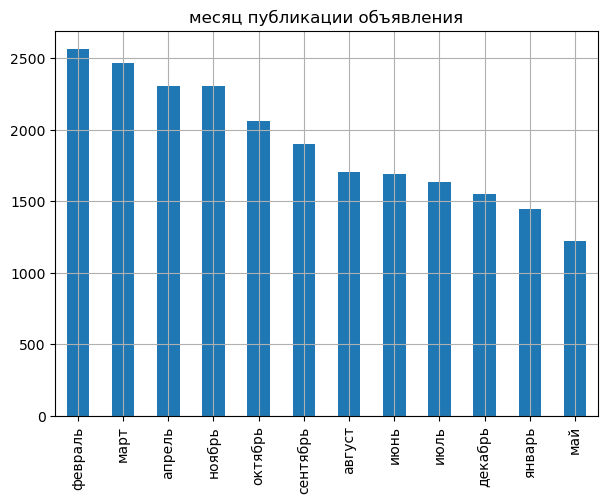

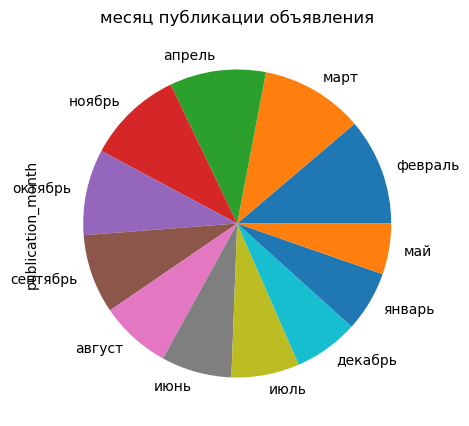

In [40]:
#строим гистаграмму для месяца публикации объявления
data['publication_month'].value_counts().plot(kind='bar',
title='месяц публикации объявления',
figsize=(7, 5),
grid=True)
plt.show()
#строим круговой график для месяца публикации объявления
data['publication_month'].value_counts().plot(kind='pie',
title='месяц публикации объявления',
figsize=(7, 5),
grid=True)
plt.show()

Чаще всего публиковали объявление в феврале и марте. Реже всего в мае и январе. На круговой гистограмме месяцы можно разделить на две группы:
- больше публикаций: февраль, март, апрель, ноябрь, октябрь, сентябрь.
- меньше публикаций: май, январь, декабрь, июль, июнь, август

 График имеет положительно скошенное распределение.

#### Изучите, как быстро продавались квартиры.

##### Постройте гистограмму.

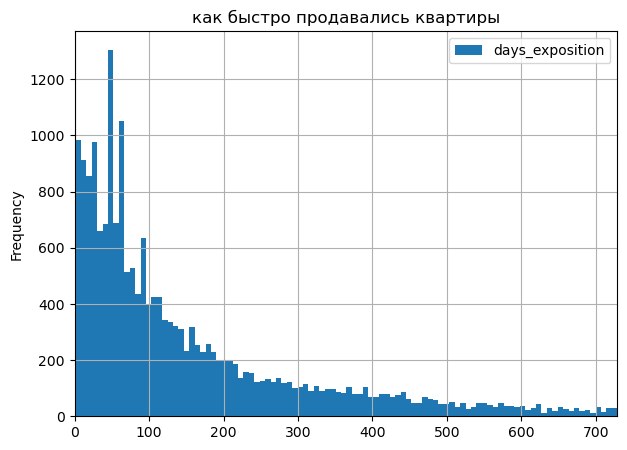

Среднее количество дней для продажи квартиры 151
Медиана количества дней для продажи квартиры 90


45.0     880
60.0     538
7.0      234
30.0     208
90.0     201
        ... 
696.0      1
597.0      1
1.0        1
644.0      1
712.0      1
Name: days_exposition, Length: 720, dtype: int64

In [41]:
#строим гистаграмму количества дней для продажи квартиры
data.plot(kind='hist',
y='days_exposition',
title='как быстро продавались квартиры',
figsize=(7, 5),
bins=100,
grid=True,
legend=True)
plt.xlim(0, 729)
plt.show()
#считаем среднюю и медиану
mean_days_exposition = data['days_exposition'].mean()
median_days_exposition = data['days_exposition'].median()

if not pd.isna(mean_days_exposition):
    print('Среднее количество дней для продажи квартиры', round(mean_days_exposition))

if not pd.isna(median_days_exposition):
    print('Медиана количества дней для продажи квартиры', round(median_days_exposition))

data['days_exposition'].value_counts()

Больше всего значений 43-53 дня, затем идут значения 1-11 дней, основная масса это значения от 1 до 95 дней, после 95 дней происходит падение графика. В основном квартиры продавались до 100 дней. Очень быстро продавались квартиры до 45 дней, очень долго продавались квартиры больше 200 дней

#### Какие факторы больше всего влияют на общую стоимость объекта?

##### Изучите, зависит ли цена от:

###### общей площади

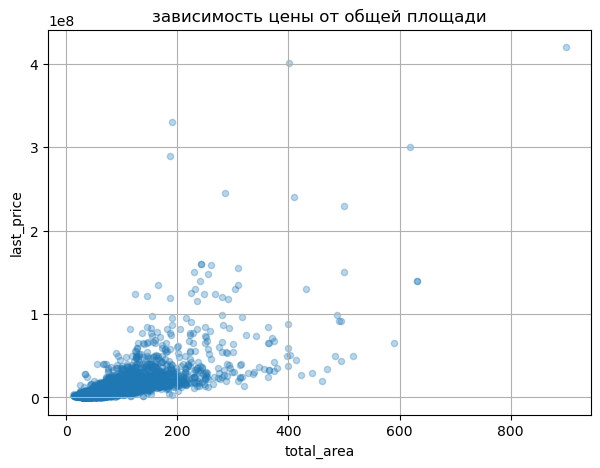

0.699933961210458

In [42]:
#строим график зависимости цены от общей площади
data.plot(kind='scatter',
y='last_price',
x='total_area',
title='зависимость цены от общей площади',
figsize=(7, 5),
alpha=0.3,
grid=True,
legend=True)
plt.show()
#считаем корреляцию Пирсона
data['last_price'].corr(data['total_area'])

значение корреляции Пирсона ближе к 1 чем к 0, цена квартиры средне зависит от общей площади

###### жилой площади

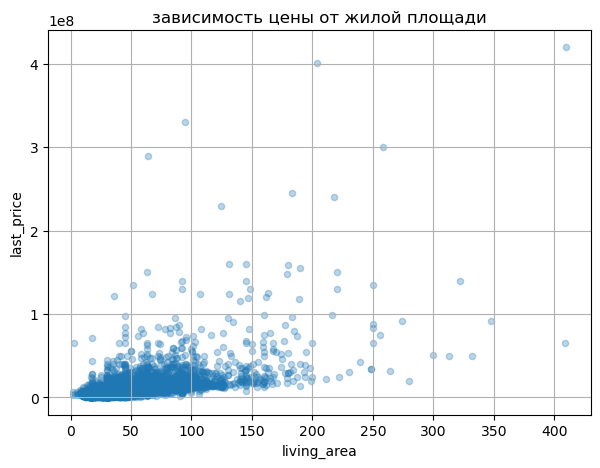

0.5862697601856572

In [43]:
#строим график зависимости цены от жилой площади
data.plot(kind='scatter',
y='last_price',
x='living_area',
title='зависимость цены от жилой площади',
figsize=(7, 5),
alpha=0.3,
grid=True,
legend=True)
plt.show()
#считаем корреляцию Пирсона
data['last_price'].corr(data['living_area'])

значение корреляции Пирсона ближе к 1, цена квартиры средне зависит от жилой площади

###### площади кухни

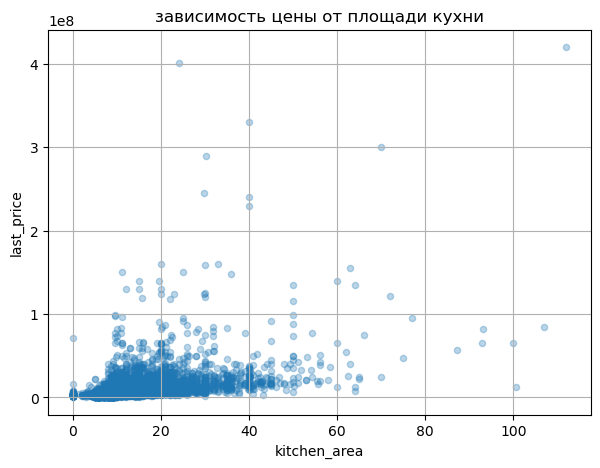

0.4969371871912323

In [44]:
#строим график зависимости цены от площади кухни
data.plot(kind='scatter',
y='last_price',
x='kitchen_area',
title='зависимость цены от площади кухни',
figsize=(7, 5),
alpha=0.3,
grid=True,
legend=True)
plt.show()
#считаем корреляцию Пирсона
data['last_price'].corr(data['kitchen_area'])

значение корреляции Пирсона ближе к 0, цена квартиры слабо зависит от площади кухни

###### количества комнат

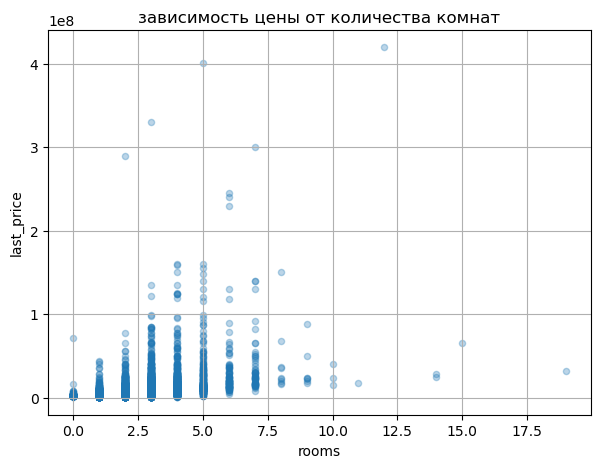

0.39056563473168415

In [45]:
#строим график зависимости цены от количества комнат
data.plot(kind='scatter',
y='last_price',
x='rooms',
title='зависимость цены от количества комнат',
figsize=(7, 5),
alpha=0.3,
grid=True,
legend=True)
plt.show()
#считаем корреляцию Пирсона
data['last_price'].corr(data['rooms'])

значение корреляции Пирсона ближе к 0, цена квартиры слабо зависит от количества комнат

###### типа этажа

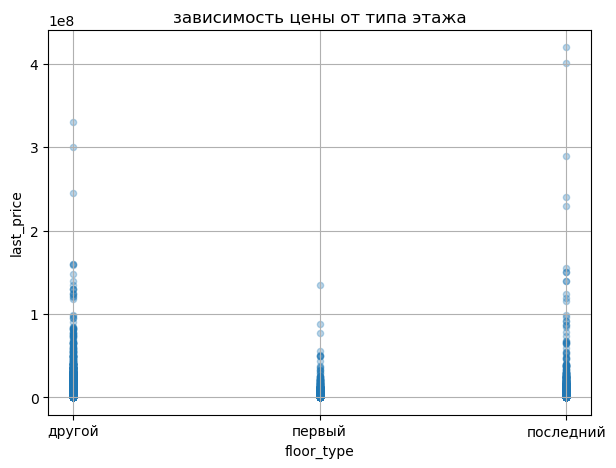

In [46]:
#строим график зависимости цены от количества комнат
data.plot(kind='scatter',
y='last_price',
x='floor_type',
title='зависимость цены от типа этажа',
figsize=(7, 5),
alpha=0.3,
grid=True,
legend=True)
plt.show()

Очень слабо зависит от типа этажа

###### даты размещения

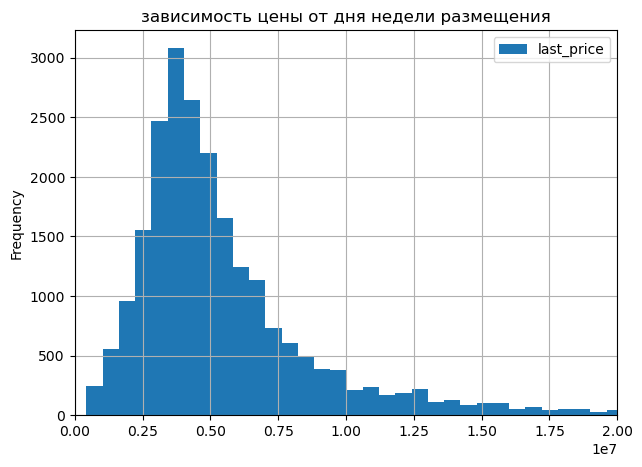

In [47]:
#строим гистаграмму зависимости цены от дня недели размещения
data.plot(kind='hist',
y='last_price',
x='day_of_the_publication_week',
title='зависимость цены от дня недели размещения',
figsize=(7, 5),
bins=700,
grid=True,
legend=True)
plt.xlim(0, 20000000)
plt.show()

Большая часть цена до 30 млн, но в выходные это сумме меньше, чем в будние дни. Цены в выходные дни меньше чем в будние дни.

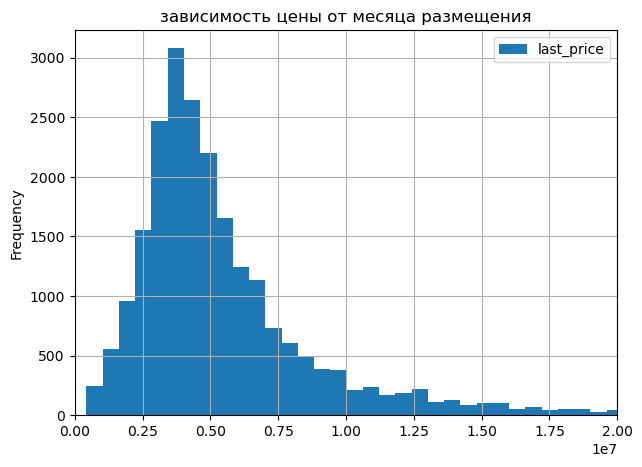

In [48]:
#строим гистаграмму зависимости  цены от месяца размещения
data.plot(kind='hist',
y='last_price',
x='publication_month',
title='зависимость цены от месяца размещения',
figsize=(7, 5),
bins=700,
grid=True,
legend=True)
plt.xlim(0, 20000000)
plt.show()

Меньше всего цена в январе, декабре и мае. Больше всего в марте, феврале, ноябре и июне

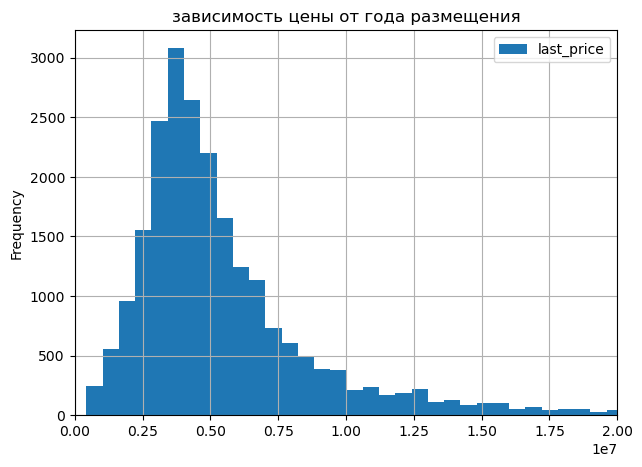

-0.034204862753161

In [49]:
#строим гистаграмму зависимости цены от года размещения
data.plot(kind='hist',
y='last_price',
x='publication_year',
title='зависимость цены от года размещения',
figsize=(7, 5),
bins=700,
grid=True,
legend=True)
plt.xlim(0, 20000000)
plt.show()
#считаем корреляцию Пирсона
data['last_price'].corr(data['publication_year'])

значение корреляции Пирсона отрицательно и близко к 0, цена квартиры слабо зависит от года размещения. На графике видно, что цены поднимаются с каждым годом, это может быть связано с инфляцией цен.

`Вывод:` цена квартиры больше всего зависит общей площади и чуть меньше от жилой площади, не зависит от года размещения и типа этажа, слабо зависит от площади кухни, количества комнат, дня недели и месяца размещения.

##### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [50]:
#считаем среднюю цену одного квардатного метра в топ 10 населенных пунктах
top_10 = data.groupby('locality_name')['price_per_square_meter'].agg(['mean', 'count'])
top_10 = top_10.sort_values(by='count', ascending=False)[:10]
top_10 = top_10.sort_values(by='mean', ascending=False)
top_10 = top_10.round()
top_10

,mean,count
locality_name,,
санкт-петербург,114485.0,15134
пушкин,103094.0,354
деревня кудрово,92614.0,280
поселок парголово,90019.0,320
поселок мурино,85715.0,534
поселок шушары,78522.0,428
колпино,75356.0,332
гатчина,68854.0,293
всеволожск,68773.0,386


Самая большая цена за квадратный метр в Санкт-Петербурге, а самая низкая цена в Выборге

##### Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра

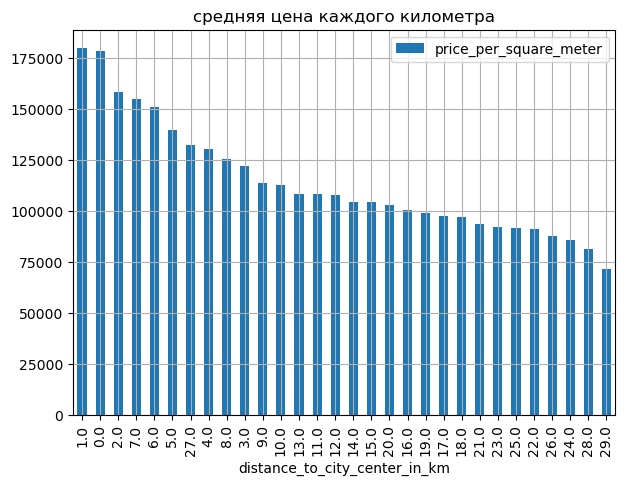

In [51]:
price_mean_km = data.query('locality_name == "санкт-петербург"')\
.pivot_table(index='distance_to_city_center_in_km', values='price_per_square_meter', aggfunc='mean')
price_mean_km = price_mean_km.sort_values(by='price_per_square_meter', ascending=False)
price_mean_km = price_mean_km.round()
price_mean_km
#строим гистаграмму зависимости цены от года размещения
price_mean_km.plot(kind='bar',
title='средняя цена каждого километра',
figsize=(7, 5),
grid=True,
legend=True)
plt.show()

Дороже всего квартиры, которые находяться очень близко, чем ближе тем больше стоит , чем дальше тем меньше стоит

### Общий вывод

 `Сделал предобработку данных:`
- Нашел и изучил пропущенные значения в столбцах, заполнил пропуски там, где это возможно, указал причины, которые могли привести к пропускам
- Рассмотрел типы данных в каждом столбце, изменил типы данных там, где это было необходимо и пояснил почему нужно было изменить тип данных
- Изучил уникальные значения в столбце с названиями и устранил неявные дубликаты
- Нашел и устранил редкие и выбивающиеся значения, восстановил корректные значения аномалий, где было возможно
 
 `Добавил в таблицу новые столбцы:`
- С ценой одного квадратного метра
- С днем недели публикации объявления
- С месяцем публикации объявления
- С годом публикации объявления
- С типом этажа квартиры
- С расстоянием до центра города в километрах

 `Провел исследовательский анализ данных:`
- Изучил общую площадь
- Изучил жилую площадь
- Изучил площадь кухни
- Изучил цену объекта
- Изучил количество комнат
- Изучил высоту потолков
- Изучил этаж квартиры
- Изучил тип этажа квартиры
- Изучил общее количество этажей в доме
- Изучил расстояние до центра города в метрах
- Изучил расстояние до ближайшего аэропорта
- Изучил расстояние до ближайшего парка
- Изучил день и месяц публикации объявления
- Построил отдельные гистограммы для каждого из этих параметров и описал все наблюдения
- Изучил как быстро продавались квартиры
- Выяснил какие факторы больше всего влияют на общую стоимость объекта
- Посчитал среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
- Вычислите среднюю цену каждого километра

На основе полученных данных можно сделать вывод, что большинство это квартиры с общей площадью 10-30 м^2. Больше всего квартир с жилой площадью 10-20 м^2. Обычно площадь кухни составляет 8-12 м^2. Чаще всего квартиры стоят 3-5 млн. Большинство это квартиры с 1-3 комнатами. В основном высота потолков это 2.6 метра. Больше всего квартир с 2 этажом, основная масса квартиры с 1-5 этажом, скорей всего из-за большого количество построенных пятиэтажек. В основном квартиры с типом этажа "другой", мало квартир с первым или последний этажом. Больше всего домов с количеством этажей 5, как и говорил ранее связано с большим количество построенных пятиэтажек, дальше идут дома с 9 этажами, мало домов с 1 этажом и домов с 25 и больше этажами. Больше всего значений 0 метров расстояние до центра города, это может быть связано с тем что это поселок и он находится очень далеко от города, затем идет основная масса это расстояние от 11000 метров до 16500 метров. Больше всего значений 0 метров расстояние до ближайшего аэропорта, проблема может быть такой же как и у расстояния до города, основная масса это расстояние от 10000 до 26000 метров. Больше всего значений 0 метров расстояние до ближайшего парка, проблема может быть такой же как и у расстояния до города, основная масса это расстояние от 200 до 700 метров. Чаще всего публиковали объявление в четверг и вторник, реже всего в выходные, люди чаще публикуют объявление в рабочий день. Чаще публикуют объявление в феврале и марте, реже в мае и январе. В основном квартиры продавались быстро до 100 дней, очень долго продавались квартиры больше 200 дней, количество дней для продажи среднее 151 день и медиана 90 дней. Больше всего на стоимость объекта влияет общая площадь и жилая площадь, не влияет дата размещения и тип этажа, слабо влияет площадь кухни и количество комнат. Самая большая цена за квадратный метр в Санкт-Петербурге, а самая низкая цена в Выборге. Дороже всего квартиры, которые находяться очень близко к центру города, чем ближе тем больше стоит , чем дальше тем меньше стоит.